# Assignment Two
---
Oisín Morrison - 10/10/19 - Hw2.ipynb

In [1]:
#standard imports for data science with python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

## Task 1
The following formula, which is not derived here, gives the horizontal variation of
the intensity of light at a screen after passing through a double slit.
$$I=I_0 \left[\frac{\operatorname{sin}(\alpha)}{\alpha}\right]^2\left[\operatorname{cos}(\beta)\right]^2, $$ $$\alpha=\frac{\pi a}{\lambda} \operatorname{sin}(\theta) \textrm{  and  } \beta=\frac{\pi d}{\lambda} \operatorname{sin}(\theta)$$
where $I_0$ is the initial intensity, a = 0.09 mm is the width of one of the slits, L = 480 mm
is the distance from the slits to the screen, d = 0.4 mm is the distance between
the slits and λ = 670 nm is the wavelength of the light.


Using the given parameters, plot the predicted 1-D intensity
pattern $\frac{I}{I_0}$ of light observed from two slits. This should be a pattern of peaks
and troughs as a function of y in millimetres, and would be what you would attempt
to measure in the lab. Note that $\operatorname{tan}(θ) = \frac{y}{L}$, and the x axis is the direction from
the slit to the screen.

To do this, I shall take the following steps:
- I'll create a function double_slit_intensity_factor(y) which will return the ratio $\frac{I}{I_0}$ for any inputted y position along the screen. As a side note on this, I won't use $\operatorname{tan}(θ) = \frac{y}{L}$ to obtain the $\operatorname{sin}(\theta)$ needed in the above formula since instead of the unwieldy expression $\operatorname{sin}(\theta)=\operatorname{sin}(\operatorname{arctan}\left(\frac{y}{L}\right))$, I can just use $\operatorname{sin}(\theta)=\frac{y}{\sqrt{y^2+L^2}}$ which is cleaner.
- I will create an array of y values to plot using numpy's linspace function.
- I will use numpy array properties to find $\frac{I}{I_0}$ for each of those y values and store it as an array called double_slit_I_over_I_0.
- I will plot double_slit_I_over_I_0 against linspace array of y-values.
- I will format my plot as I see fit, adding labels and formatting etc.

In [2]:
def double_slit_intensity_factor(y):
    """This function will return the intensity factor (I over I_0) for a double slit for any given y-value as an input"""
    a=0.09*10**(-3) #given data converted to SI units
    d=0.4*10**(-3) #given data converted to SI units
    wavelength=670*10**(-9) #given data converted to SI units
    L=480 #given data, and we want y in mm for some reason so I need to keep L in mm then...
    z=(y**2+L**2)**0.5 #defining the length of the hypothenuse so I can do sin(theta)=y/z
    alpha=np.pi*a/wavelength*y/z #find the alpha value in the given formula
    beta=np.pi*d/wavelength*y/z #find the beta value in the given formula
    return ((np.sin(alpha)/alpha)**2*(np.cos(beta))**2) #return the intensity factor

(-5, 5)

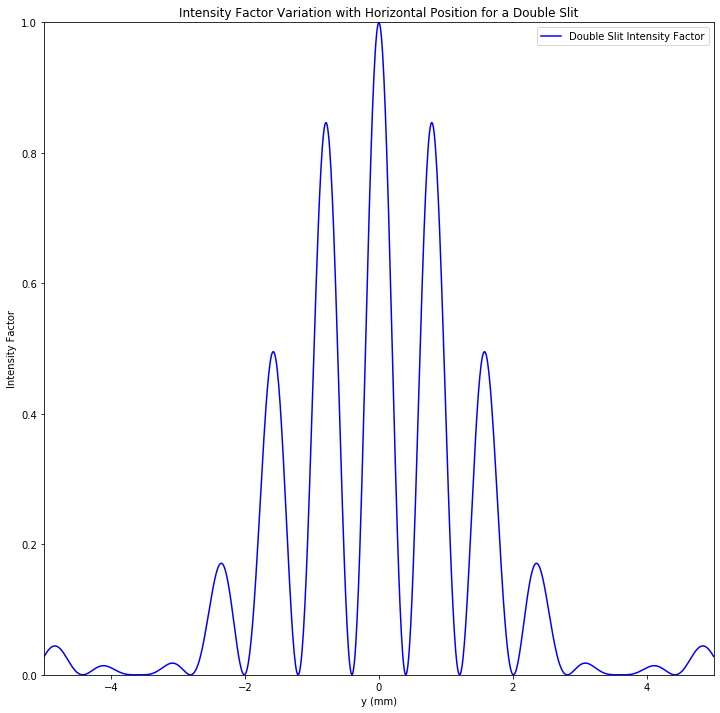

In [3]:
#creating my numpy array of y values centered at 0. I've taken 1000 values for a smooth curve.
Y=np.linspace(-5,5,1000)
#creating an array of all the intensity factors for each of these values.
double_slit_I_over_I_0=double_slit_intensity_factor(Y)

fig, ax = plt.subplots(figsize=(12,12)) #standard plot setup. I'm making the figure bigger since it was quite small as default
ax.plot(Y,double_slit_I_over_I_0,'b-', label="Double Slit Intensity Factor") #doing the plotting
ax.legend() #labelling
ax.set(xlabel='y (mm)', ylabel='Intensity Factor') #labelling
ax.set_title("Intensity Factor Variation with Horizontal Position for a Double Slit") #labelling

#initial plot had a lot of empty space, so I decided to remove it.
ax.set_ylim([0,1])
ax.set_xlim([-5,5])

## Task 2

On the same figure now plot the predicted 1-D intensity pattern of light
observed from just one of the slits.

For a single slit, we have:
$$I=I_0 \left[\frac{\operatorname{sin}(\alpha)}{\alpha}\right]^2, $$ $$\alpha=\frac{\pi a}{\lambda} \operatorname{sin}(\theta)$$

To do this, I shall:
- Define a new function single_slit_intensity_factor which will return the intensity factor of a single slit for any given y value as input.
- I will create a new array of the single slit intensity factors for each of the y values in my numpy linspace array from Task 1 and call it single_slit_I_over_I_0.
- On the same plt.subplots() I used in Task 1, I shall plot single_slit_I_over_I_0 against my linspace array of y values.

In [4]:
def single_slit_intensity_factor(y):
    """This function will return the intensity factor (I over I_0) for a single slit for any given y-value as an input"""
    a=0.09*10**(-3) #given data converted to SI units
    d=0.4*10**(-3) #given data converted to SI units
    wavelength=670*10**(-9) #given data converted to SI units
    L=480 ##given data, and we want y in mm for some reason so I need to keep L in mm then...
    z=(y**2+L**2)**0.5 #defining the length of the hypothenuse so I can do sin(theta)=y/z
    alpha=np.pi*a/wavelength*y/z #find the alpha value in the given formula
    return (np.sin(alpha)/alpha)**2 #return the intensity factor

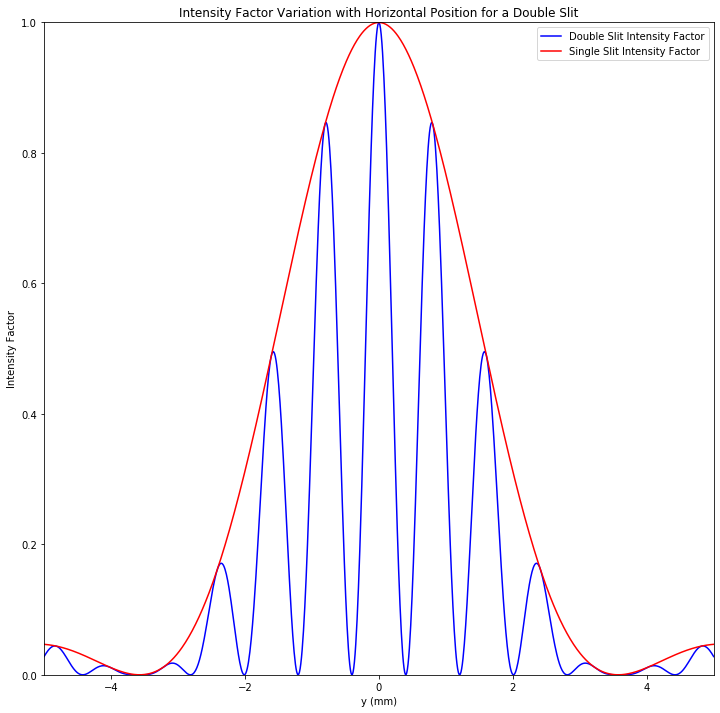

In [5]:
#creating my array of intensity factors for the single slit
single_slit_I_over_I_0=single_slit_intensity_factor(Y)

ax.plot(Y, single_slit_I_over_I_0, 'r-', label="Single Slit Intensity Factor") #plotting my single slit intensity factors
ax.legend() #labelling

fig #show plot

#Don't need to do any other formatting since I'm using an already formatted plot from Task 1.

## Task 3

Develop your program to simulate the appearance of the pattern in 2-D
on the viewing card in the experiment. Initially here, just assume that the 1-D
pattern is repeated in vertical direction. This 2-D colour plot should now look like
a set of bands in y and z. Make sure your plot axes are labelled with correct units.
An aspect ratio between y and z of 3:2 should look about right.

For this, I did the following:
- After doing some research online, I found that matplotlib.pyplot had three methods which achieved 2D colour plotting: matplotlib.pyplot.imshow, matplotlib.pyplot.pcolor and matplotlib.pyplot.pcolormesh. Further research told me that pcolormesh was more efficient that pcolor, so I reneged on using pcolor. Not knowing which method was better, I decided to try both pcolormesh and imshow.
- Both of these functions required as an input a 2D array of intensity values. For this part, each of my sub-arrays would be identical since I am simply extending the pattern along the z-axis. So, I need to construct this 2D array. I ended up doing this two ways:
    - For my first plot (using pcolormesh), I created an np.ones() array and then proceeded to create the 2D array by multiplying each element in my double_slit_I_over_I_0 in turn by each element in my np.ones() array. I could have used two for loops for this, but instead I used the more concise np.array([i*j for j in y for i in x]) code and then reshaped the output to the correct format (1D array to 2D). This method will generalise nicely to Task 4.
    - For my second plot (using imshow), I realised I could do this in a very concise manner using lists. I could simply just multiply [list(double_slit_I_over_I_0)] by 1000.
- I then proceeded to plot these idenitcal 2D arrays. I experimented with colour maps and found that afmhot seemed to fit quite nicely.
- I then formatted the plot as I saw fit as normal. I stuck to the 3:2 aspect ratio as recommended for this task.

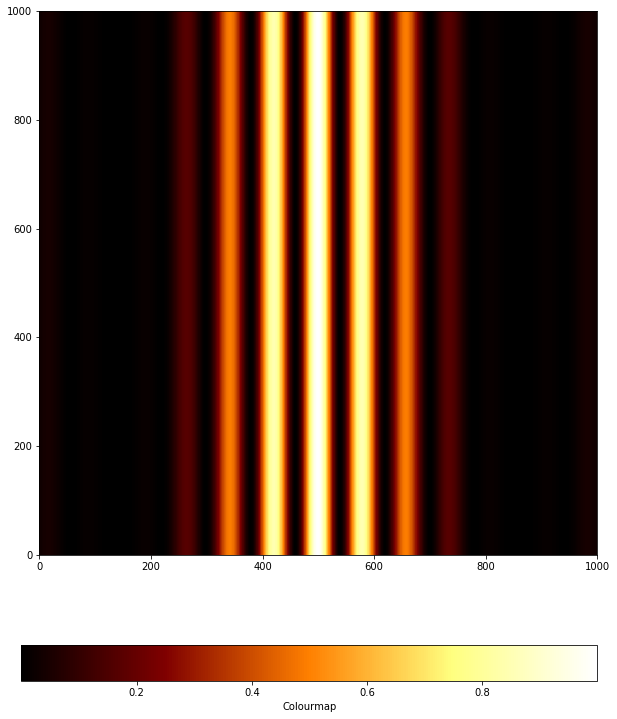

In [6]:
#making my numpy ones array
y=np.ones(1000)
x=double_slit_I_over_I_0 #just naming this x for convenience

z = np.array([i*j for j in y for i in x]) #using this method to create my array values, though this will be a 1D array
Z = z.reshape(1000, 1000) #now converting it to be a 2D array as required

fig,ax=plt.subplots(figsize=(10,10)) #standard plot initialisation

cax = fig.add_axes([0.1, -0.05, 0.8, 0.05]) #specifying position where to put colour bar

cmap = plt.cm.afmhot #using the afmhot colour map

im=ax.pcolormesh(Z, cmap=cmap) #doing the plotting
fig.colorbar(im, cax=cax, orientation='horizontal', label= "Colourmap") #adding a colour bar below the plot

plt.show() #show the plot

This plot shows the right pattern but the labelling on the axes is well off, which meant there was little benefit in me adding labels to the plot or changing the aspect ratio. As a result, I decided to leave this plot and move onto the imshow plot, where I did find a way to rectify this. In short, the plot above is more or less a trial run and the plot below is the one to look at.

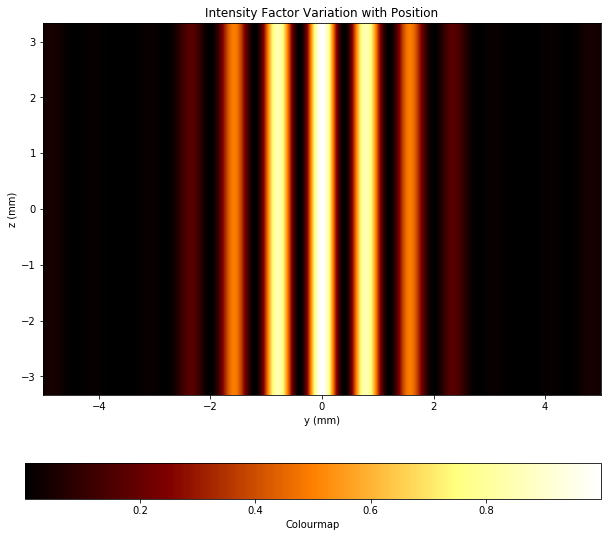

In [7]:
Z=[list(double_slit_I_over_I_0)]*1000 #constructing array of values to plot

fig,ax=plt.subplots(figsize=(10,10)) #initialising a plot as standard

cax = fig.add_axes([0.1, 0.1, 0.8, 0.05]) #specifying colour bar location

cmap = plt.cm.afmhot #using the afmhot colour map

im=ax.imshow(Z, cmap, interpolation='bilinear', extent=[-5,5,-5,5]) #plotting. The extent list specifies the range of our axes as we failed to achieve in the previous plot
fig.colorbar(im, cax=cax, orientation='horizontal', label="Colourmap") #adding a colour bar
ax.set_ylim(-5*2/3,5*2/3) #setting y limit so that the aspect ratio is 3:2

ax.set(xlabel='y (mm)', ylabel='z (mm)') #labelling
ax.set_title("Intensity Factor Variation with Position") #labelling

plt.show() #show the plot

## Task 4

The real variation of the light observed in the z-direction is that it falls
off away from the axis. This is because the light undergoes single-slit diffraction
in this direction. Identify the diffraction part of the formula above to determine
an appropriate function for the fall off in intensity in the z-direction, and hence
apply it to your 2-D plot. The manual does not record the slit height, so try a
height b = 1.0 mm to start with. You should aim to obtain a final 2-D plot that
looks like that observed in the two-slit experiment.

Following Task 3 where I successfully used imshow, I shall proceed to use that and that only for this task.

To do this, I shall proceed to execute the following:
- Since we are supposed to start with a height b=1mm i.e. the height may change, I shall create a new function single_slit_intensity_factor_new(y,a) which a y co-ordinate and a height as parameters and returns the single slit intensity of at that y co-ordinate with those conditions. Note that the single slit intensity pattern will be in the z plane so I will only be interested in the height for that function. Likewise, for the double slit intensity pattern, I will only be interested in the slit width.
- I shall then use the method I used for my pcolormesh plot in Task 3 to create the 2D array necessary for me to plot.
- I shall plot this using imshow and then format the plot as I see fit. To this end, I made several plots and explain why below.

In [8]:
def single_slit_intensity_factor_new(y,a):
    """This function will return the intensity factor (I over I_0) for a single slit with a slit height a for any given y-value as an input"""
    d=0.4*10**(-3) #given data converted to SI units
    wavelength=670*10**(-9) #given data converted to SI units
    L=480 ##given data, and we want y in mm for some reason so I need to keep L in mm then...
    z=(y**2+L**2)**0.5 #defining the length of the hypothenuse so I can do sin(theta)=y/z
    alpha=np.pi*a/wavelength*y/z #find the alpha value in the given formula
    return (np.sin(alpha)/alpha)**2 #return the intensity factor

Text(0.5, 1.0, 'Intensity Factor Variation with Position')

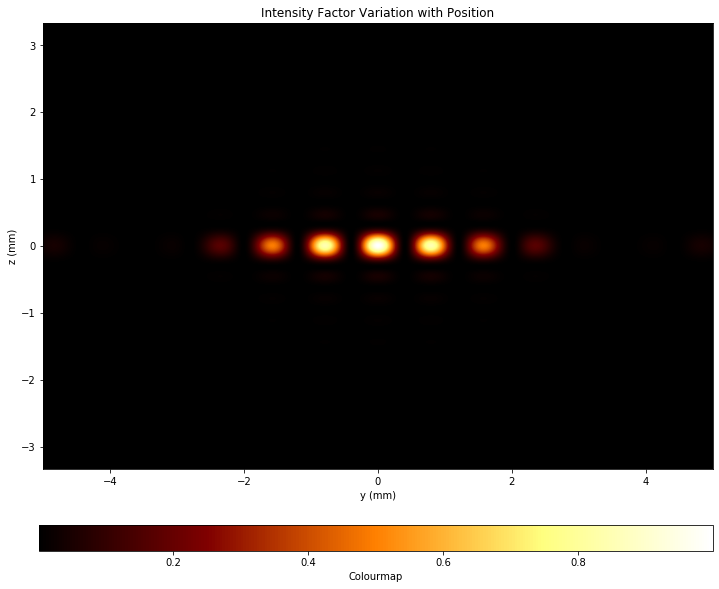

In [9]:
#creating my array values for the single slit intensity pattern with the suggested slit height of 1mm
y=single_slit_intensity_factor_new(Y,10**-3)

#reusing my double slit intensity pattern (the slit width is constant so I don't need to change anything)
x=double_slit_I_over_I_0 

#creating a 1D array of all possible permuations of values in x multiplied by values in y, order correctly.
z = np.array([i*j for j in y for i in x])
#converting this array to be a 2D array as required for plotting
Z = z.reshape(1000, 1000)

fig,ax=plt.subplots(figsize=(12,12)) #initialising plot as standard

cmap = plt.cm.afmhot #same colourmap as before to be consistent

ax.imshow(Z, cmap,interpolation='bilinear', extent=[-5,5,-5,5]) #plotting as before
ax.set_ylim(-5*2/3,5*2/3) #setting y limit so we get a 3:2 aspect ratio

cax = fig.add_axes([0.12, 0.15, 0.78, 0.03]) #specify colour bar location
fig.colorbar(im, cax=cax, orientation='horizontal', label="Colourmap") #create colour bar

ax.set(xlabel='y (mm)', ylabel='z (mm)') #labelling
ax.set_title("Intensity Factor Variation with Position") #labelling

Now, this output is fine and is the expected shape. However, there is currently an enormous amount of black space which is very wasteful and not desirable. As a result, I would suggest either changing the aspect ratio or the slit height. I've done both of these below to demonstrate.

Text(0.5, 1.0, 'Intensity Factor Variation with Position')

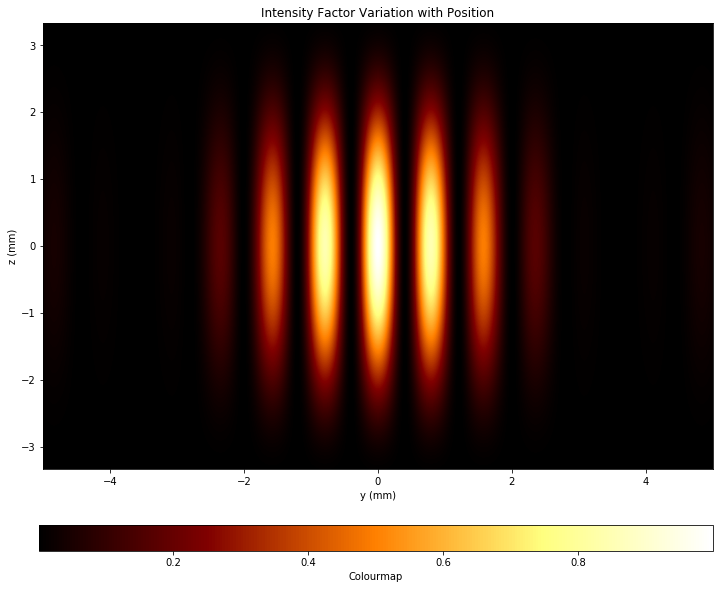

In [10]:
#creating my array values for the single slit intensity pattern with a slit height equal to the slit height
y=single_slit_intensity_factor_new(Y,0.09*10**(-3))

#reusing my double slit intensity pattern (the slit width is constant so I don't need to change anything)
x=double_slit_I_over_I_0 

#creating a 1D array of all possible permuations of values in x multiplied by values in y, order correctly.
z = np.array([i*j for j in y for i in x])
#converting this array to be a 2D array as required for plotting
Z = z.reshape(1000, 1000)

fig,ax=plt.subplots(figsize=(12,12)) #initialising plot as standard

cmap = plt.cm.afmhot #same colourmap as before to be consistent

ax.imshow(Z, cmap,interpolation='bilinear', extent=[-5,5,-5,5]) #plotting as before
ax.set_ylim(-5*2/3,5*2/3) #setting y limit so we get a 3:2 aspect ratio

cax = fig.add_axes([0.12, 0.15, 0.78, 0.03]) #specify colour bar location
fig.colorbar(im, cax=cax, orientation='horizontal', label="Colourmap") #create colour bar

ax.set(xlabel='y (mm)', ylabel='z (mm)') #labelling
ax.set_title("Intensity Factor Variation with Position") #labelling

We see that changing the slit height to be equal to the slit width does indeed yield a graph which fits a lot better with the aspect ratio. However, it is unlikely that our slits would be perfectly symmetrical. With this in mind, I think it would be better simply to change the aspect ratio and I shall do this below.

Text(0.5, 1.0, 'Intensity Factor Variation with Position')

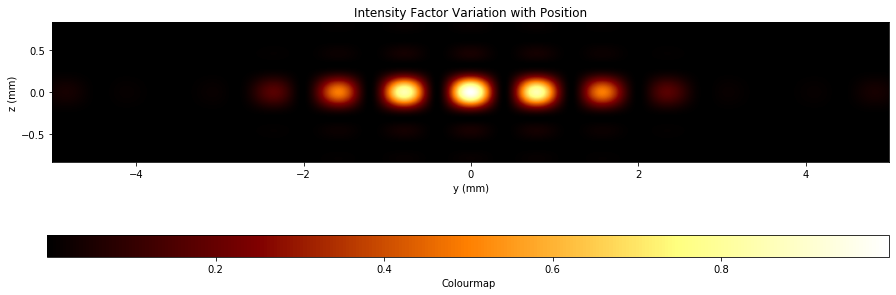

In [11]:
#creating my array values for the single slit intensity pattern with the suggested slit height of 1mm
y=single_slit_intensity_factor_new(Y,10**-3)

#reusing my double slit intensity pattern (the slit width is constant so I don't need to change anything)
x=double_slit_I_over_I_0 

#creating a 1D array of all possible permuations of values in x multiplied by values in y, order correctly.
z = np.array([i*j for j in y for i in x])
#converting this array to be a 2D array as required for plotting
Z = z.reshape(1000, 1000)

fig,ax=plt.subplots(figsize=(15,15)) #initialising plot as standard. Changed the figsize to account for our aspect ratio change

cmap = plt.cm.afmhot #same colourmap as before to be consistent

ax.imshow(Z, cmap,interpolation='bilinear', extent=[-5,5,-5,5]) #plotting as before
ax.set_ylim(-5*1/6,5*1/6) #setting y limit differently so we get a different aspect ratio

cax = fig.add_axes([0.12, 0.35, 0.78, 0.02]) #specify colour bar location
fig.colorbar(im, cax=cax, orientation='horizontal', label="Colourmap") #create colour bar

ax.set(xlabel='y (mm)', ylabel='z (mm)') #labelling
ax.set_title("Intensity Factor Variation with Position") #labelling

I have changed the aspect ratio to 6:1 in the plot above and we see that this plot is a lot better in terms of not having so much empty space. As a result, I would suggest that 3:2 is not the best aspect ratio to use for this.